In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

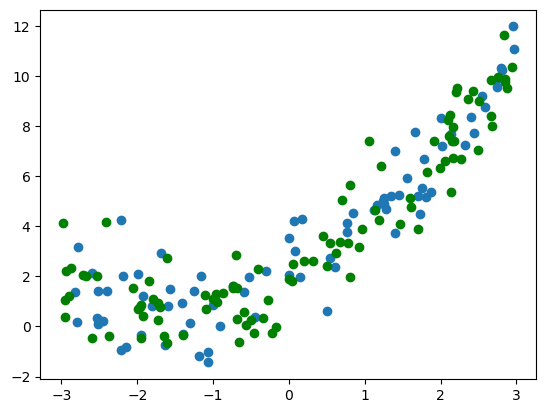

In [80]:
x=6*np.random.rand(100,1)-3
y=0.5*x**2+1.5*x+2+np.random.randn(100,1)
plt.scatter(x,y,color='g')
plt.show()

In [81]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [82]:
# NO need to normalise already values are close
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [83]:
from sklearn.metrics import r2_score
score=r2_score(y_test,regression.predict(X_test))
print(score)

0.6616359849304924


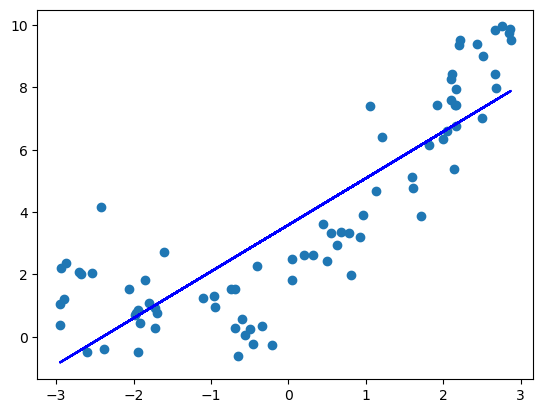

In [84]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train),color='b')
plt.show()

In [85]:
from sklearn.preprocessing import PolynomialFeatures
poly_feature=PolynomialFeatures(degree=2,include_bias=True)
x_train_poly=poly_feature.fit_transform(X_train)
x_test_poly=poly_feature.transform(X_test)
x_train_poly


array([[ 1.00000000e+00,  4.22458645e-02,  1.78471307e-03],
       [ 1.00000000e+00,  2.66869701e+00,  7.12194372e+00],
       [ 1.00000000e+00,  2.16977992e+00,  4.70794491e+00],
       [ 1.00000000e+00, -1.94468615e+00,  3.78180423e+00],
       [ 1.00000000e+00, -9.60780408e-01,  9.23098992e-01],
       [ 1.00000000e+00,  1.60405607e+00,  2.57299589e+00],
       [ 1.00000000e+00, -9.42507624e-01,  8.88320620e-01],
       [ 1.00000000e+00,  5.44910773e-01,  2.96927750e-01],
       [ 1.00000000e+00, -5.01277975e-01,  2.51279608e-01],
       [ 1.00000000e+00,  1.91861182e+00,  3.68107132e+00],
       [ 1.00000000e+00,  2.68338670e+00,  7.20056420e+00],
       [ 1.00000000e+00,  2.13546551e+00,  4.56021294e+00],
       [ 1.00000000e+00, -5.65134715e-01,  3.19377246e-01],
       [ 1.00000000e+00,  9.60678223e-01,  9.22902647e-01],
       [ 1.00000000e+00,  6.26185185e-01,  3.92107886e-01],
       [ 1.00000000e+00,  2.49709040e+00,  6.23546045e+00],
       [ 1.00000000e+00,  7.83977563e-01

In [86]:
regression1=LinearRegression()
regression1.fit(x_train_poly,y_train)


LinearRegression()

In [71]:
print(regression1.coef_)

[[-2.24000539e+01 -2.44576665e+00 -9.20818094e+00  1.49073923e+01
   1.62719417e+01 -1.00580166e+01 -5.49178440e+00 -7.08464126e+00
  -9.78370299e+00  7.50058917e+00  6.25063798e+00  4.11587753e+00
   6.85666857e+00 -8.29221010e+00 -1.09457257e+01  5.00302983e+00
   6.81392433e+00 -1.66855953e+00 -2.49683537e+00  3.46555296e-01
   5.93075932e-01 -4.64170774e-02 -9.38904301e-02  4.00009763e-03
   9.83533700e-03 -2.14740400e-04 -6.53779079e-04  6.64961982e-06
   2.49111385e-05 -9.53413401e-08 -4.12770572e-07]]


In [13]:
print(regression1.intercept_)

[2.07737492]


In [14]:
x_train_poly.shape,y_train.shape,x_test_poly.shape

((80, 4), (80, 1), (20, 4))

In [87]:
from sklearn.metrics import r2_score
regression=LinearRegression()
regression.fit(x_train_poly,y_train)
y_pred=regression.predict(x_test_poly)
score=r2_score(y_test,y_pred)
score

0.8779079677636414

In [16]:
X_test.shape,X_train.shape,x_train_poly.shape,x_test_poly.shape

((20, 1), (80, 1), (80, 4), (20, 4))

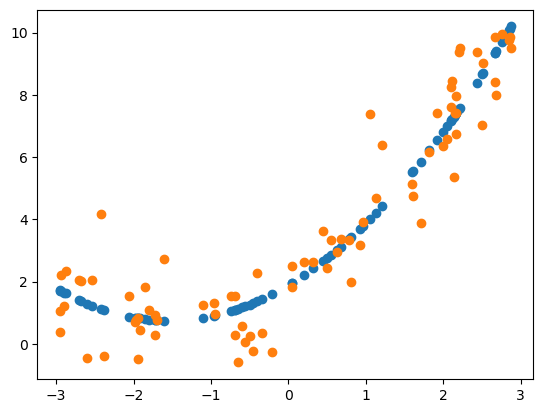

In [88]:
plt.scatter(X_train,regression1.predict(x_train_poly))
plt.scatter(X_train,y_train)
plt.show()

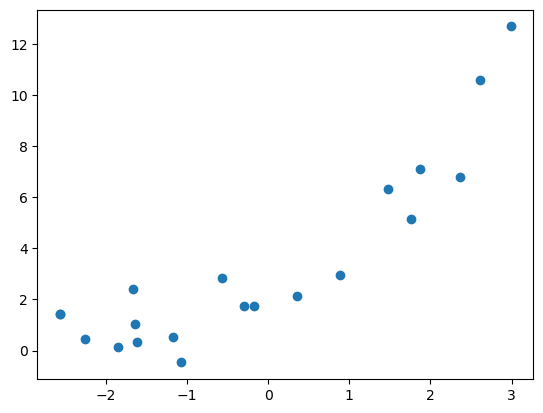

In [18]:
# plt.scatter(X_test,regression1.predict(x_test_poly))
plt.scatter(X_test,y_test)
plt.show()

# Prediction of new data set

In [90]:
X_new=np.linspace(-3,3,200).reshape(200,1)
X_new_poly=poly_feature.transform(X_new)
y_new=regression.predict(X_new_poly)
X_new_poly.shape,X_new.shape

((200, 3), (200, 1))

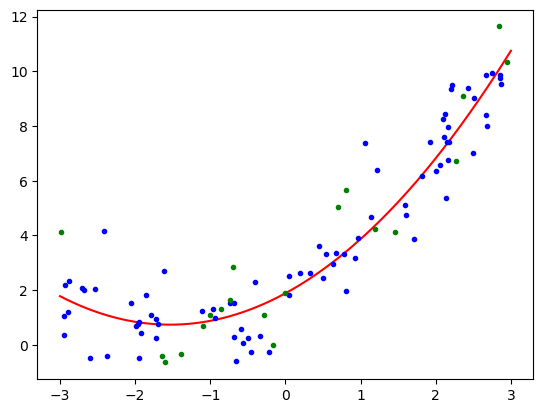

In [91]:
y_new=regression.predict(X_new_poly)
plt.plot(X_new,y_new,"r-")
plt.plot(X_train,y_train,"b.")
plt.plot(X_test,y_test,"g.")
plt.show()

# Pipeline Concepts


In [21]:
from sklearn.pipeline import Pipeline

In [22]:
def poly_regression(degree):
    x_new=np.linspace(-3,3,200).reshape(200,1)
    poly_features=PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg=LinearRegression()
    poly_regression=Pipeline([
        ("poly_features",poly_features),
        ("lin_reg",lin_reg)
    ])
    poly_regression.fit(X_train,y_train) ## ploynomial and fit of linear reression
    y_pred_new=poly_regression.predict(X_new)
    
    # plotting prediction line
    plt.plot(x_new,y_pred_new,'r')
    plt.plot(X_train,y_train,'b.')
    plt.plot(X_test,y_test,'g.')
    plt.axis([-4,4,0,10])
    plt.show()
    print(y_pred_new.shape)


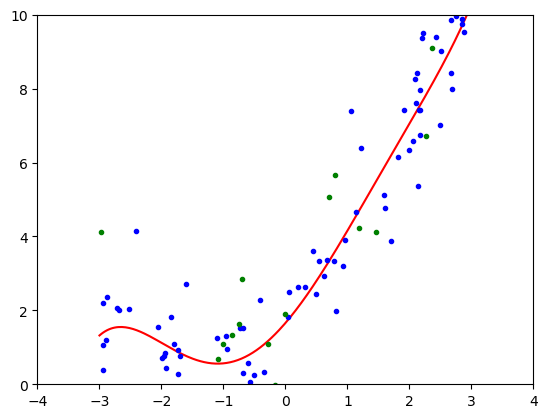

(200, 1)


In [92]:
poly_regression(6)